## Vivek Divakarla - Final Project

In [152]:
import praw
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
sid = SentimentIntensityAnalyzer()

In [2]:
#Connecting to the Reddit API
reddit = praw.Reddit(
    client_id="v3vO4pDtvVubymNRxFfnag",
    client_secret="UMHrFJteF0s5Cq6Yqatyjbi6oc_gTQ",
    user_agent="nba-scrape",
    username="vivekdivakarla123",
    password="Coolrunner123#"
)

In [86]:
#getting top posts from the Cavaliers Subreddit, 1 of the 30 NBA teams
subreddit = reddit.subreddit("clevelandcavs")

posts = subreddit.top(time_filter='year', limit=10)
combined_string = " "
for post in posts:
    combined_string += f"Title: {post.title} "
    combined_string += "Comments: "
    post.comments.replace_more(limit=None) 
    for comment in post.comments.list():
        combined_string += f"{comment.body} "
    combined_string += " "

In [88]:
#Text Preprocessing
processed_text = combined_string.lower().replace('\n', '')

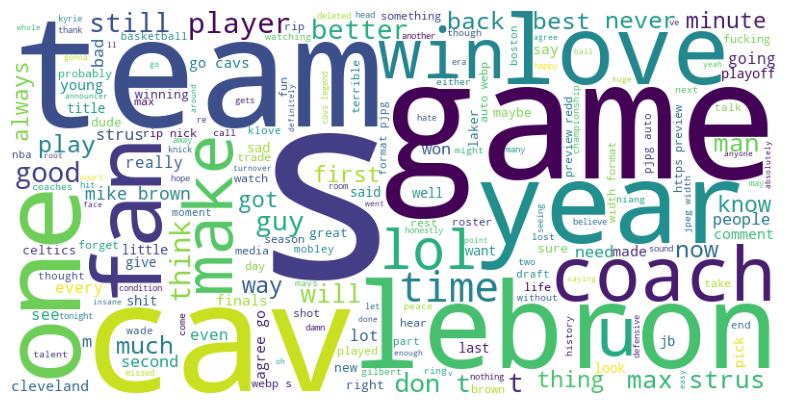

In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#WordCloud of the Cavaliers subreddit data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [91]:
team_dict2 = {}

In [104]:
#Main Sentiment Function, used for each team
#Gets the top posts from the year, then calculated polarity scores
def sentiment(subreddit):
    sub = reddit.subreddit(subreddit)
    posts = sub.top(time_filter='year', limit=10)
    #posts = sub.top(limit=10) posts used for the recent weight
    combined_string = " "
    for post in posts:
        combined_string += "comments: "
        post.comments.replace_more(limit=None)  
        for comment in post.comments.list():
            combined_string += f"{comment.body} "
        combined_string += " "
    processed_text = combined_string.lower().replace('\n', '')
    sentences = processed_text.split("comments:")
    tokenized_sentences = [sentence.strip().split() for sentence in sentences if sentence.strip()]
    positive_scores = []
    negative_scores = []

    for sentence in sentences:
        if sentence.strip():
            sentiment_scores = sid.polarity_scores(sentence.strip())
            positive_scores.append(sentiment_scores['pos'])
            negative_scores.append(sentiment_scores['neg'])
    
    #Calculating index by doing the positive mean - the negative mean
    sum_positive = 0
    positive_mean = 0
    for x in positive_scores:
        sum_positive += x
    positive_mean = sum_positive/len(positive_scores)
    negative_mean = 0
    sum_negative = 0
    for x in negative_scores:
        sum_negative += x    
    negative_mean = sum_negative/len(negative_scores)
    mean_diff = positive_mean - negative_mean
    team_dict2[subreddit] = mean_diff
    print('sentiment added')

In [108]:
#Calculating sentiment for each team - may take time
sentiment("clevelandcavs")
sentiment("warriors")
sentiment("lakers")
sentiment("bostonceltics")
sentiment("torontoraptors")
sentiment("sixers")
sentiment("chicagobulls")
sentiment("rockets")
sentiment("NYKnicks")
sentiment("Thunder")
sentiment("MkeBucks")
sentiment("mavericks")
sentiment("NBASpurs")
sentiment("timberwolves")
sentiment("washingtonwizards")
sentiment("UtahJazz")
sentiment("ripcity")
sentiment("suns")
sentiment("kings")
sentiment("heat")
sentiment("denvernuggets")
sentiment("AtlantaHawks")
sentiment("GoNets")
sentiment("OrlandoMagic")
sentiment("DetroitPistons")
sentiment("LAClippers")
sentiment("pacers")
sentiment("CharlotteHornets")
sentiment("NOLAPelicans")
sentiment("memphisgrizzlies")

sentiment added
sentiment added
sentiment added
sentiment added
sentiment added
sentiment added
sentiment added
sentiment added
sentiment added


In [130]:
happiness_df = pd.DataFrame(list(team_dict2.items()), columns=['Team', 'Happiness Index'])
happiness_df_sorted = happiness_df.sort_values(by='Happiness Index', ascending=False)
happiness_df_sorted['Happiness Index - Recent Weight'] = [team_dict.get(team, None) for team in happiness_df_sorted['Team']]
happiness_df_sorted.head()

,Team,Happiness Index,Happiness Index - Recent Weight
24,CharlotteHornets,0.1247,0.053909
10,NBASpurs,0.1244,0.061909
13,UtahJazz,0.1226,0.174909
1,warriors,0.1217,0.087182
28,denvernuggets,0.1145,0.051727


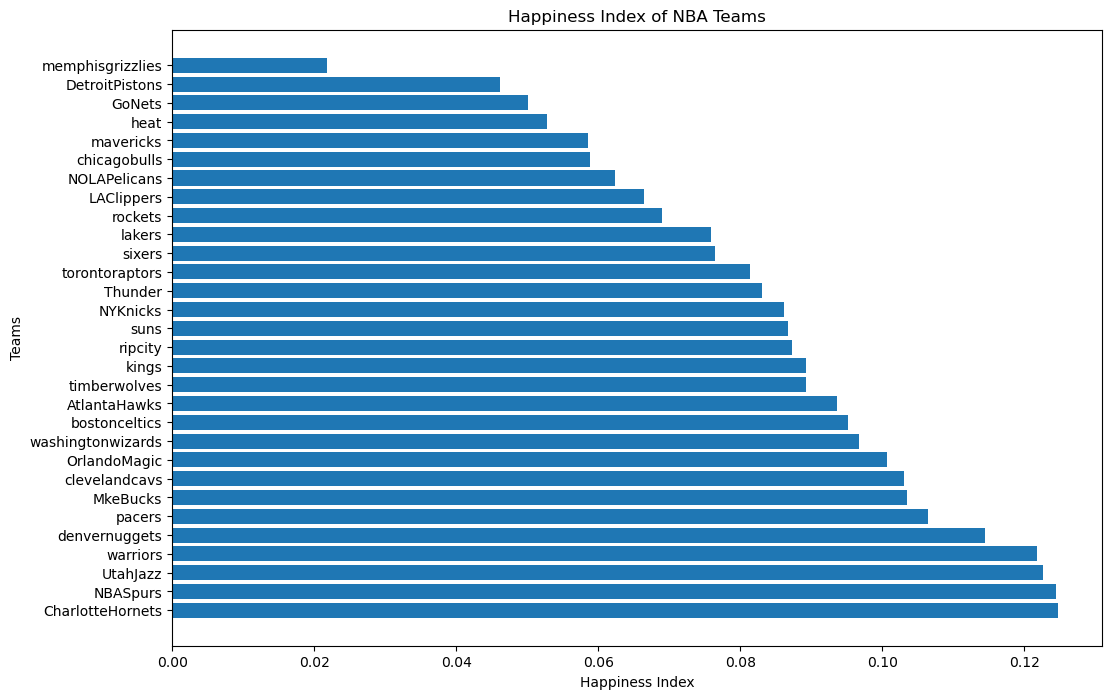

In [132]:
#Plot of Happiness Index
plt.figure(figsize=(12, 8))
plt.barh(happiness_df_sorted['Team'], happiness_df_sorted['Happiness Index'])
plt.xlabel('Happiness Index')
plt.ylabel('Teams')
plt.title('Happiness Index of NBA Teams')
plt.show()

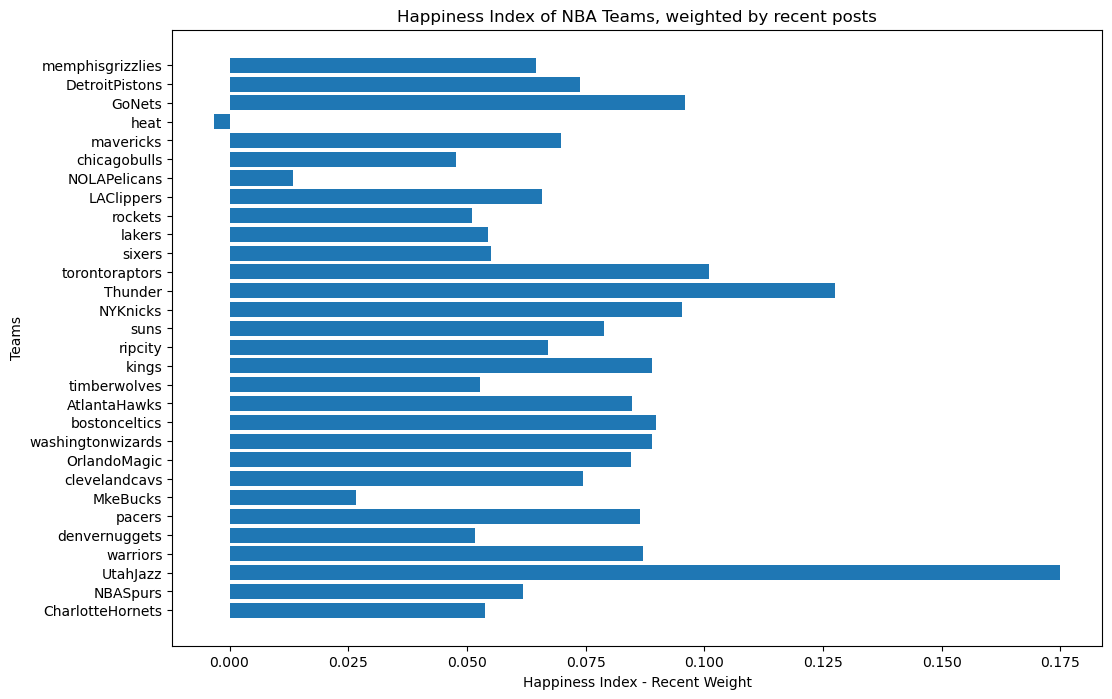

In [133]:
#Plot of Happiness Index, weighted by Recent Posts
plt.figure(figsize=(12, 8))
plt.barh(happiness_df_sorted['Team'], happiness_df_sorted['Happiness Index - Recent Weight'])
plt.xlabel('Happiness Index - Recent Weight')
plt.ylabel('Teams')
plt.title('Happiness Index of NBA Teams, weighted by recent posts')
plt.show()

In [155]:
#Read CSV of NBA Stats and merge with happiness index
nbastats = pd.read_csv('nba stats.csv')
full_df = pd.merge(happiness_df_sorted, nbastats, on='Team')
full_df['Total Cap'] = full_df['Total Cap'].str.replace(',', '').astype(int)
full_df['Avg Attendance'] = full_df['Avg Attendance'].str.replace(',', '').astype(int)

In [157]:
#Calculate Correlation
correlation = full_df.corr()['Happiness Index']
sorted_correlation = correlation.abs().sort_values(ascending=False)
print(sorted_correlation)

Happiness Index                    1.000000
Happiness Index - Recent Weight    0.307008
Wins vs Expected                   0.135038
Avg Attendance                     0.121517
Win %                              0.063787
SRS                                0.063775
Total Cap                          0.018024
L10 W%                             0.009475
Name: Happiness Index, dtype: float64


/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_10220/2343108839.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = full_df.corr()['Happiness Index']


In [151]:
recent_correlation = full_df.corr()['Happiness Index - Recent Weight']
sorted_correlation_recent = recent_correlation.abs().sort_values(ascending=False)
print(sorted_correlation_recent)

Happiness Index - Recent Weight    1.000000
Total Cap                          0.316689
Happiness Index                    0.307008
L10 W%                             0.190494
Win %                              0.130124
Avg Attendance                     0.126483
SRS                                0.088215
Wins vs Expected                   0.025064
Name: Happiness Index - Recent Weight, dtype: float64


/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_10220/1063052827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  recent_correlation = full_df.corr()['Happiness Index - Recent Weight']
